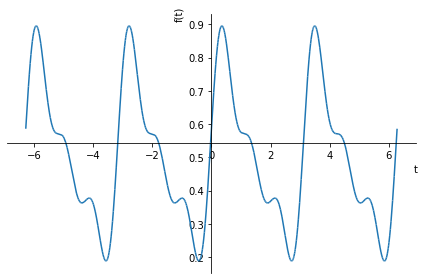

In [10]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import I

t = sp.symbols('t')
i = I #variavel complexa

x = sp.exp(-t/2)
x

xs = sp.fourier_series(x, (t, 0, sp.pi))
x1 = xs.truncate(n=4)
x1.evalf(3)

p = sp.plot(x1, (t, -2*sp.pi, 2*sp.pi))

a0 = (1/sp.pi)*sp.integrate(x, (t,0,sp.pi))
a0.evalf(3)

w0 = 2
n = sp.symbols('n', constant=True)
an = (2/sp.pi)*sp.integrate(x*sp.cos(n*w0*t) , (t, 0, sp.pi))
an.simplify().evalf(3)

an = lambda n: (2/sp.pi)*sp.integrate(x*(sp.cos(2*n*t), (t, 0, sp.pi)))


In [11]:
bn = (2/sp.pi)*sp.integrate(x*sp.sin(n*w0*t) , (t, 0, sp.pi))
bn.simplify().evalf(3)

0.265*(-4.0*n*cos(2*pi*n) + 19.2*n - sin(2*pi*n))/(16.0*n**2 + 1.0)

In [12]:
#A série esponencial
Dn = (1/sp.pi)*sp.integrate(x*(sp.exp(-i*n*w0*t)), (t, 0, sp.pi))
Dn .simplify().evalf(3)

0.318*(2.0*exp(pi*(2*I*n + 1/2)) - 2.0)*exp(-pi*(2*I*n + 1/2))/(4.0*I*n + 1.0)

In [13]:
Dn = lambda n: (1/sp.pi)*sp.integrate(x*(sp.exp(-i*n*w0*t)), (t, 0, sp.pi))
D = Dn(1).evalf(3)

In [18]:
magD = np.abs(D)
magD
phaseD = np.angle(D)
phaseD.round(3)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [20]:
N = 10
D = np.zeros(2*N+1).astype(complex)
n = np.arange(-N, N+1)
for k in np.arange(0,len(n)):
    D[k] = Dn(n[k])

In [21]:
D.round(3)

array([0.   +0.013j, 0.   +0.014j, 0.   +0.016j, 0.001+0.018j,
       0.001+0.021j, 0.001+0.025j, 0.002+0.031j, 0.003+0.042j,
       0.008+0.062j, 0.03 +0.119j, 0.504+0.j   , 0.03 -0.119j,
       0.008-0.062j, 0.003-0.042j, 0.002-0.031j, 0.001-0.025j,
       0.001-0.021j, 0.001-0.018j, 0.   -0.016j, 0.   -0.014j,
       0.   -0.013j])

In [24]:
magDn = np.abs(D)
phaseDn = np.angle(D)*180/np.pi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0.5, 1.0, 'Espectro de Magnitude de x(t)')

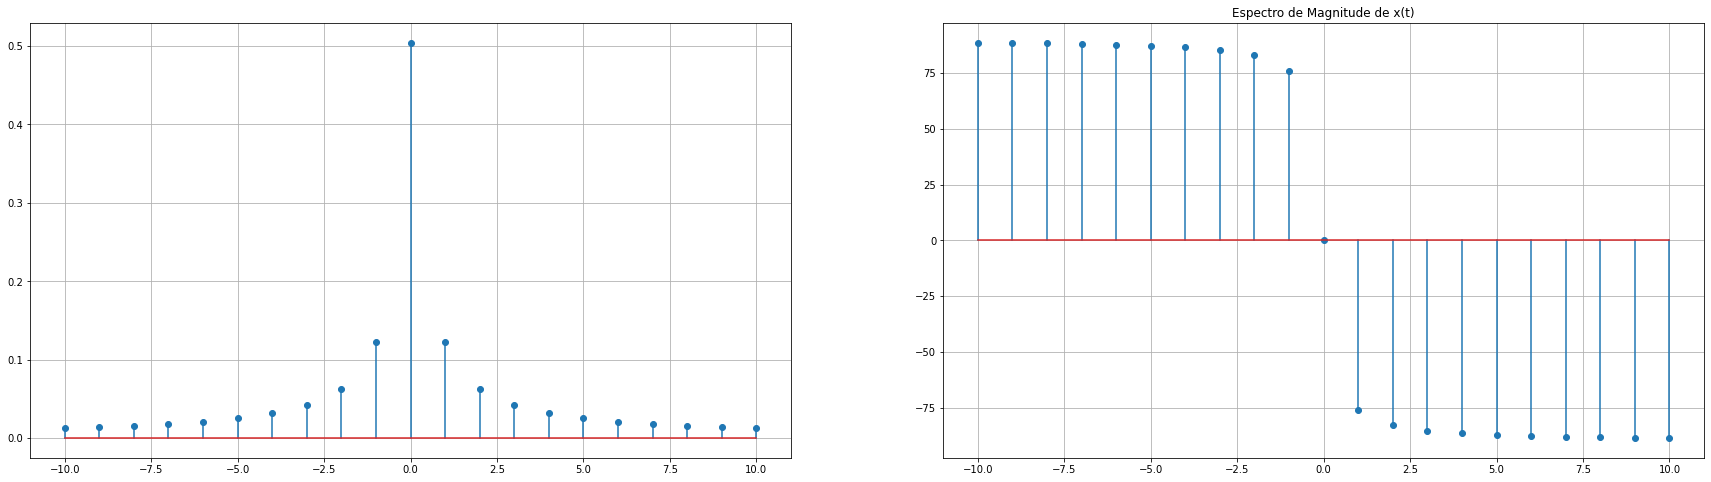

In [25]:
plt.figure(figsize=(30,8))
plt.subplot(121)
plt.stem(n, magDn)
plt.grid()
plt.subplot(122)
plt.stem(n,phaseDn)
plt.grid()
plt.title('Espectro de Magnitude de x(t)')